In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import numpy as np
import xarray as xr

In [2]:
var='u'

vmin=0.04
vmax=0.052
colormap='viridis'

hgts_c=[ 2.12]#, 10.03]
hgts_h=[ 2.26]#, 9.88]

fs=14

In [3]:
path_dns='/glade/u/home/adac/work/DNSdata/DNS_SBL_L320/Re1800/'

# timesteps=[616000]
timesteps=[623000]
# timesteps=[630000]
nt=len(timesteps)

ds = xr.open_dataset(path_dns+var+str(timesteps[0])+'.nc',decode_times=0)
print(ds)

w=ds[var][0].values

try:
  x=ds['xh'].values
except:
  x=ds['x'].values
nx=len(x)

try:
  y=ds['yh'].values
except:
  y=ds['y'].values
ny=len(y)

try:
  z=ds['zh'].values
  hgts=hgts_h
except:
  z=ds['z'].values
  hgts=hgts_c

<xarray.Dataset> Size: 5GB
Dimensions:  (xh: 640, y: 640, z: 3328, time: 1)
Coordinates:
  * xh       (xh) float32 3kB 0.0 0.04279 0.08558 0.1284 ... 27.26 27.3 27.34
  * y        (y) float32 3kB 0.0214 0.06419 0.107 0.1498 ... 27.28 27.32 27.36
  * z        (z) float32 13kB 0.002716 0.008147 0.01358 ... 18.06 18.07 18.07
  * time     (time) int32 4B -2147483647
Data variables:
    u        (time, z, y, xh) float32 5GB ...


<xarray.Dataset> Size: 5GB
Dimensions:  (xh: 640, y: 640, z: 3328, time: 1)
Coordinates:
  * xh       (xh) float32 3kB 0.0 0.04279 0.08558 0.1284 ... 27.26 27.3 27.34
  * y        (y) float32 3kB 0.0214 0.06419 0.107 0.1498 ... 27.28 27.32 27.36
  * z        (z) float32 13kB 0.002716 0.008147 0.01358 ... 18.06 18.07 18.07
  * time     (time) int32 4B -2147483647
Data variables:
    u        (time, z, y, xh) float32 5GB ...


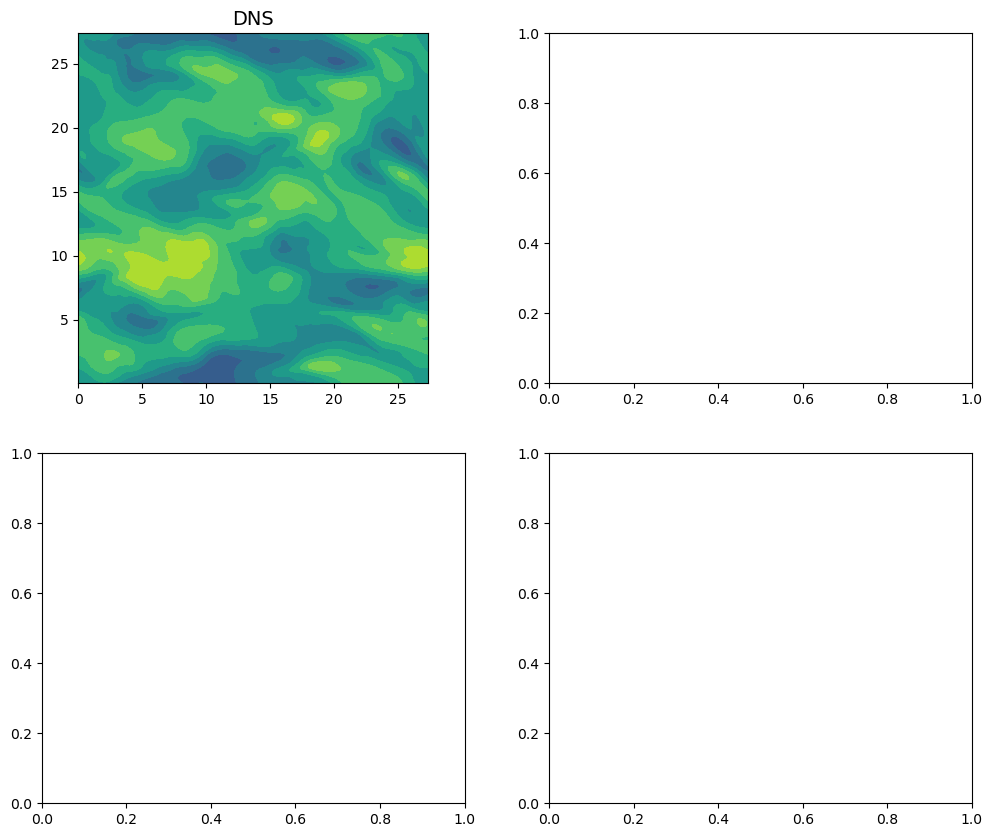

In [4]:
for hgt in hgts:
    k = np.abs(z - hgt).argmin()
    for it, timestep in enumerate(timesteps):
        fig, ax = plt.subplots(2,2,figsize = (12, 10))

        ds = xr.open_dataset(path_dns+var+str(timestep)+'.nc',decode_times=0)
        print(ds)

        w=ds[var][0].values

        ax[0,0].contourf(x,y,w[k],vmin=vmin,vmax=vmax,cmap=colormap)
        ax[0,0].set_aspect('equal')
        ax[0,0].set_title('DNS',fontsize=fs)

<xarray.Dataset> Size: 110MB
Dimensions:  (z: 64, y: 32, x: 32, time: 15)
Coordinates:
  * z        (z) float64 512B 0.5648 0.8473 1.13 1.412 ... 17.79 18.07 18.36
  * y        (y) float64 256B 0.4279 1.284 2.14 2.995 ... 24.39 25.25 26.1 26.96
  * x        (x) float64 256B 0.4279 1.284 2.14 2.995 ... 24.39 25.25 26.1 26.96
  * time     (time) int64 120B 616000 617000 618000 ... 628000 629000 630000
Data variables: (12/14)
    u        (z, y, x, time) float64 8MB ...
    v        (z, y, x, time) float64 8MB ...
    w        (z, y, x, time) float64 8MB ...
    tau11    (z, y, x, time) float64 8MB ...
    tau22    (z, y, x, time) float64 8MB ...
    tau33    (z, y, x, time) float64 8MB ...
    ...       ...
    tau23    (z, y, x, time) float64 8MB ...
    b        (z, y, x, time) float64 8MB ...
    ub       (z, y, x, time) float64 8MB ...
    vb       (z, y, x, time) float64 8MB ...
    wb       (z, y, x, time) float64 8MB ...
    p        (z, y, x, time) float64 8MB ...


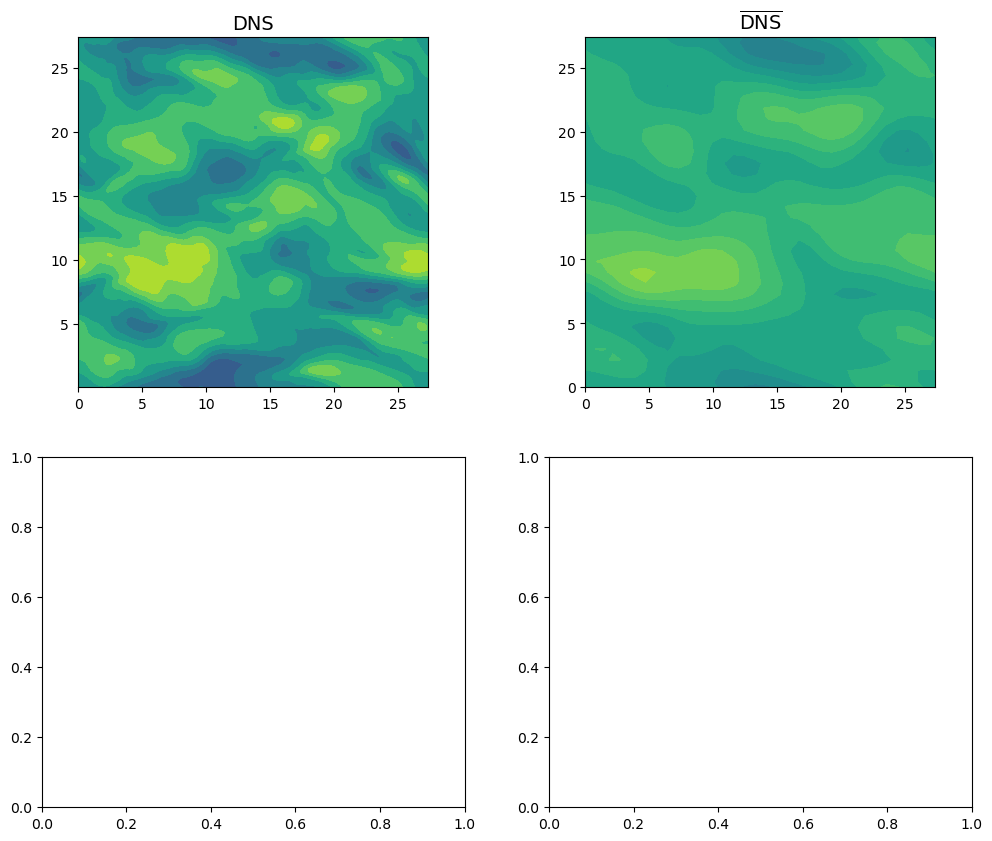

In [5]:
path_les="/glade/work/adac/DNStoLES/coarseData/"
file="coarse4x2052_Re1800.nc"
title=r'$\overline{\text{DNS}}$'
dscoarse = xr.open_dataset(path_les+file)
print(dscoarse)

zcoarse=dscoarse['z'].values
#yc=dscoarse['y'].values
xc=dscoarse['x'].values
dx=np.mean(np.diff(xc))

xcoarse=np.concatenate(([xc[0]-dx/2.0],xc,[xc[-1]+dx/2.0]))
ycoarse=xcoarse
#print(xcoarse[0])
#print(xcoarse[-1])

dacoarse=dscoarse[var]


for hgt in hgts:
    kcoarse = np.abs(zcoarse - hgt).argmin()
    for it, timestep in enumerate(timesteps):

        ucoarse=dacoarse.sel(time=timestep)[kcoarse].values
        ucoarse=np.insert(ucoarse,0,(ucoarse[:,-1]+ucoarse[:,0])/2.0,axis=1)
        ucoarse=np.column_stack((ucoarse,ucoarse[:,0]))#,axis=1)
        ucoarse=np.insert(ucoarse,0,(ucoarse[-1,:]+ucoarse[0,:])/2.0,axis=0)
        ucoarse=np.row_stack((ucoarse,ucoarse[0,:]))#,axis=0)

        ax[0,1].contourf(xcoarse,ycoarse,ucoarse,vmin=vmin,vmax=vmax,cmap=colormap)
        ax[0,1].set_aspect('equal')
        ax[0,1].set_title(title,fontsize=fs)
        
fig

In [7]:
paths=[ '../cases/SBL_global_midGridReInterp/', '../cases/SBL_local_midGridReInterp/']
pathLabels=['Global','Local']
timesteps=[7]

for iLES, path in enumerate(paths):
    # ds = xr.open_dataset(path+var+'_longTime.nc')
    ds = xr.open_dataset(path+var+'.nc')
    print(ds)
    
    try:
      x=ds['xh'].values
    except:
      x=ds['x'].values

    try:
      y=ds['yh'].values
    except:
      y=ds['y'].values

    try:
      z=ds['zh'].values
      hgts=hgts_h
    except:
      z=ds['z'].values
      hgts=hgts_c

    for hgt in hgts:
        k = np.abs(z - hgt).argmin()
        for it, timestep in enumerate(timesteps):
            
            w=ds[var][timestep].values
            
            ax[1,iLES].contourf(x,y,w[k],vmin=vmin,vmax=vmax,cmap=colormap)

            ax[1,iLES].set_aspect('equal')
            ax[1,iLES].set_title(pathLabels[iLES],fontsize=fs)

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 15, z: 64, y: 32, xh: 32)
Coordinates:
  * time     (time) float64 120B 0.0 100.0 200.0 ... 1.2e+03 1.3e+03 1.4e+03
  * z        (z) float64 512B 0.1412 0.4236 0.706 0.9885 ... 17.37 17.65 17.93
  * y        (y) float64 256B 0.4279 1.284 2.14 2.995 ... 24.39 25.25 26.1 26.96
  * xh       (xh) float64 256B 0.0 0.8558 1.712 2.567 ... 24.82 25.67 26.53
Data variables:
    u        (time, z, y, xh) float64 8MB ...
<xarray.Dataset> Size: 4MB
Dimensions:  (time: 8, z: 64, y: 32, xh: 32)
Coordinates:
  * time     (time) float64 64B 0.0 100.0 200.0 300.0 400.0 500.0 600.0 700.0
  * z        (z) float64 512B 0.1412 0.4236 0.706 0.9885 ... 17.37 17.65 17.93
  * y        (y) float64 256B 0.4279 1.284 2.14 2.995 ... 24.39 25.25 26.1 26.96
  * xh       (xh) float64 256B 0.0 0.8558 1.712 2.567 ... 24.82 25.67 26.53
Data variables:
    u        (time, z, y, xh) float64 4MB ...


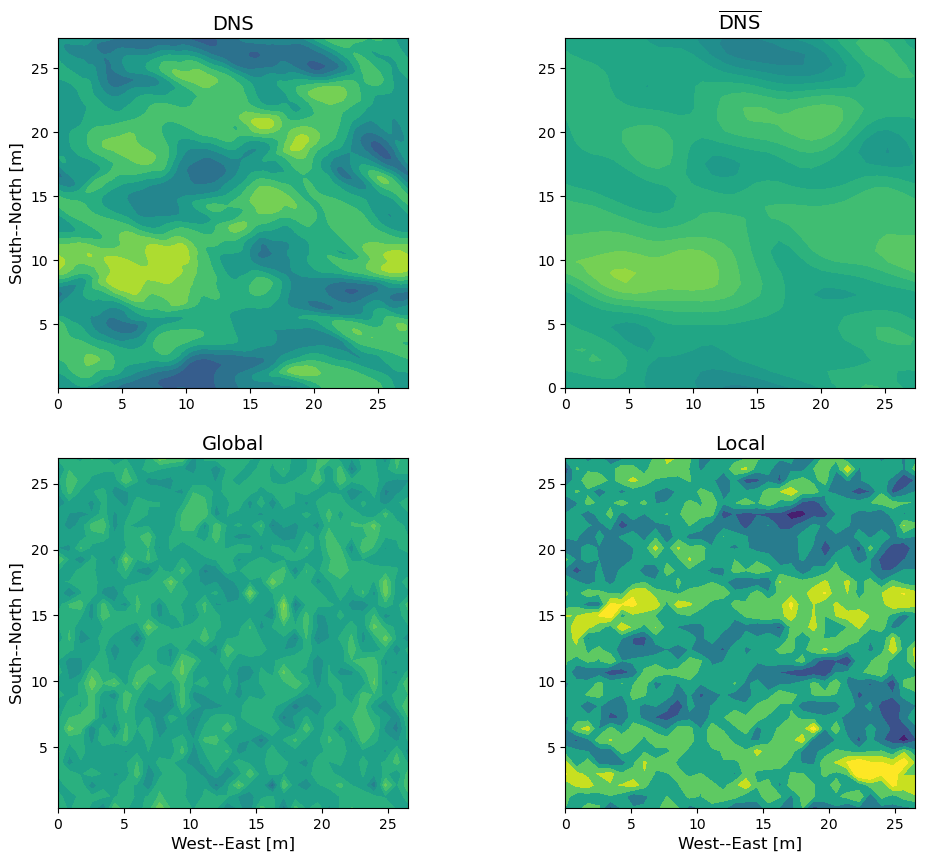

In [8]:
for j in range(len(ax[0])):
    for i in range(len(ax)):
        ax[i,0].set_ylabel('South--North [m]',fontsize=12)
        ax[1,j].set_xlabel('West--East [m]',fontsize=12)
        ax[i,j].tick_params(labelsize=10)

        
fig

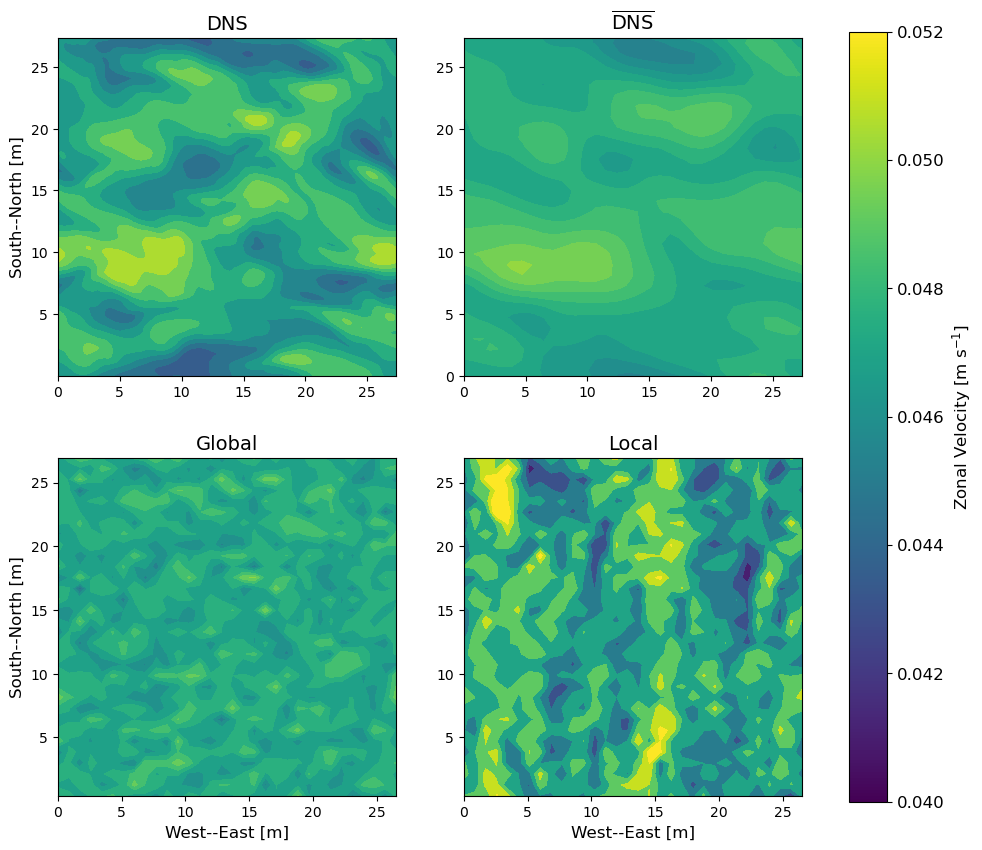

In [8]:
# fig.subplots_adjust(right=0.8)
cb=fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax), cmap=colormap),ax=ax.ravel().tolist())
cb.ax.tick_params(labelsize=12)
cb.set_label(label='Zonal Velocity [m s$^{-1}$]',fontsize=12)
# fig.tight_layout()      
fig

In [9]:
save=True
if save:
    plt.figure(fig)
    fmts=["png","eps"]
    for fmt in fmts:
        plt.savefig("XYcontour_u_interp."+fmt, format=fmt)

In [10]:
# #fig.suptitle('Vertical velocity at '+str(int(zplot))+' m above ground, time='+str(timesteps[i])+' s')
# fig.savefig('wXYcontour_k'+str(k)+'_z'+str(int(hgt))+'_t'+str(timestep)+'.png',format='png',transparent=True)
# plt.show()
# plt.close(fig)

In [11]:
# for i in range(nt):

#     ds = xr.open_dataset(path_dns+'w'+str(timesteps[i])+'.nc',decode_times=0)
#     da=ds['w'][0]

#     x=ds['x'].values
#     #print(x[0])
#     #print(x[-1])
#     y=ds['y'].values
#     z=ds['zh'].values

#     kplot = np.abs(zcoarse - 10).argmin()

#     nz=len(zcoarse)
#     for kcoarse in [kplot]:#range(nz):

#         ucoarse=dacoarse.sel(time=timesteps[i])[kcoarse].values
#         ucoarse=np.insert(ucoarse,0,(ucoarse[:,-1]+ucoarse[:,0])/2.0,axis=1)
#         ucoarse=np.column_stack((ucoarse,ucoarse[:,0]))#,axis=1)
#         ucoarse=np.insert(ucoarse,0,(ucoarse[-1,:]+ucoarse[0,:])/2.0,axis=0)
#         ucoarse=np.row_stack((ucoarse,ucoarse[0,:]))#,axis=0)

#         zplot=zcoarse[kcoarse]
#         k = np.abs(z - zplot).argmin()
#         u=da[k].values

#         fig,ax = plt.subplots(1,2,figsize = (20, 8))
#         ax[0].contourf(x,y,u,vmin=vmin,vmax=vmax,cmap='bwr')
#         ax[0].set_aspect('equal')
#         ax[0].set_title('High resolution',fontsize=48)
#         ax[0].set_ylabel('South--North [m]',fontsize=20)
#         ax[0].set_xlabel('West--East [m]',fontsize=20)
#         ax[0].tick_params(labelsize=18)
        
#         im=ax[1].contourf(xcoarse,ycoarse,ucoarse,vmin=vmin,vmax=vmax,cmap='bwr')
#         ax[1].set_aspect('equal')
#         ax[1].set_title('Coarse resolution',fontsize=48)
#         ax[1].set_ylabel('South--North [m]',fontsize=20)
#         ax[1].set_xlabel('West--East [m]',fontsize=20)
#         ax[1].tick_params(labelsize=18)
        
#         #fig.subplots_adjust(right=0.8)
#         #cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#         #cbar_ax.set_visible(False)
#         cb=fig.colorbar(cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax), cmap='bwr'),ax=ax.ravel().tolist())
#         #cb.set_clim(vmin=-0.004,vmax=0.004)
#         #.clim(-0.004,0.004)
#         cb.ax.tick_params(labelsize=18)
#         cb.set_label(label='Vertical Velocity [m s$^{-1}$]',fontsize=32)

#         #fig.suptitle('Vertical velocity at '+str(int(zplot))+' m above ground, time='+str(timesteps[i])+' s')
#         fig.savefig('wXYcontour_k'+str(k)+'_z'+str(int(zplot))+'_t'+str(timesteps[i])+'.png',format='png',transparent=True)
#         plt.show()
#         plt.close(fig)
